<a href="https://colab.research.google.com/github/Ankur099IIT/Natural-Language-Processing-Course-3-Deeplearning.ai/blob/main/Comparing_four_models_for_the_IMDB_reviews_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow_datasets as tfds

imdb, info = tfds.load('imdb_reviews', with_info = True, as_supervised = True)


In [2]:
print(info)

tfds.core.DatasetInfo(
    name='imdb_reviews',
    version=1.0.0,
    description='Large Movie Review Dataset.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.',
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
        'text': Text(shape=(), dtype=tf.string),
    }),
    total_num_examples=100000,
    splits={
        'test': 25000,
        'train': 25000,
        'unsupervised': 50000,
    },
    supervised_keys=('text', 'label'),
    citation="""@InProceedings{maas-EtAl:2011:ACL-HLT2011,
      author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher},
      title     = {Learning Word

In [3]:
imdb # a dictionary

{'test': <PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'train': <PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'unsupervised': <PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [4]:
train_data, test_data = imdb['train'], imdb['test']



In [5]:
len(test_data)

25000

In [6]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s, l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())

for s, l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())





In [7]:
len(testing_sentences)

25000

In [8]:
training_sentences[:5]

["This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
 'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development wa

In [9]:
training_labels[:5]

[0, 0, 0, 1, 1]

In [10]:
testing_sentences[:5]

["There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of the aforementioned movies. I haven't laughed this hard since I saw THE FULL MONTY. (And, even then, I don't think I laughed quite this hard... So to speak.) Tukel's talent is considerable: DING-A-LING-LESS is so chock full of double entendres that one would have to sit down with a copy of this script and do a line-by-line examination of it to fully appreciate the, uh, breadth and width of it. Every shot is beautifully composed (a clear sign of a sure-handed director), and the performances all around are solid (there's none of the over-the-top scenery chewing one might've expected from a film like this). DING-A-LING-LESS is a film whose time has come.",
 "A blackly comic tale of a down-trodden priest, Nazarin

In [11]:
testing_labels[:5]

[1, 1, 0, 0, 1]

In [12]:
# Converting list into numpy arrays because after tokeization, sequencing and padding it generated the numpy for training and testing_sentences

import numpy as np
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 10000
oov_tok = '<OOV>'
trunc_type = 'post'
max_length = 120

tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)

tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(training_sentences)

training_padded = pad_sequences(sequences, maxlen = max_length, truncating = trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length, truncating = trunc_type)

Model 1: Flatten

In [14]:
import tensorflow as tf

embedding_dim = 16
dense_dim = 6

model_flatten = tf.keras.Sequential([
                tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(dense_dim, activation = 'relu'),
                tf.keras.layers.Dense(1, activation = 'sigmoid')                    
])

model_flatten.compile(loss = 'binary_crossentropy',
                      optimizer = 'adam',
                      metrics = ['accuracy'])

model_flatten.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 flatten (Flatten)           (None, 1920)              0         
                                                                 
 dense (Dense)               (None, 6)                 11526     
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [15]:
history_flatten = model_flatten.fit(training_padded, training_labels_final, epochs = 10, validation_data = (testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 7s 8ms/step - loss: 0.5126 - accuracy: 0.7228 - val_loss: 0.3761 - val_accuracy: 0.8331
Epoch 2/10
782/782 [==============================] - 6s 8ms/step - loss: 0.2424 - accuracy: 0.9063 - val_loss: 0.4169 - val_accuracy: 0.8174
Epoch 3/10
782/782 [==============================] - 7s 9ms/step - loss: 0.0897 - accuracy: 0.9776 - val_loss: 0.5070 - val_accuracy: 0.8093
Epoch 4/10
782/782 [==============================] - 6s 7ms/step - loss: 0.0214 - accuracy: 0.9974 - val_loss: 0.5995 - val_accuracy: 0.8067
Epoch 5/10
782/782 [==============================] - 7s 9ms/step - loss: 0.0056 - accuracy: 0.9996 - val_loss: 0.6640 - val_accuracy: 0.8101
Epoch 6/10
782/782 [==============================] - 6s 7ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.7304 - val_accuracy: 0.8100
Epoch 7/10
782/782 [==============================] - 6s 7ms/step - loss: 8.4177e-04 - accuracy: 1.0000 - val_loss: 0.7707 - val_accuracy: 0.8120
Ep

In [16]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()


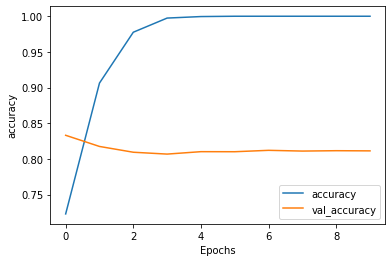

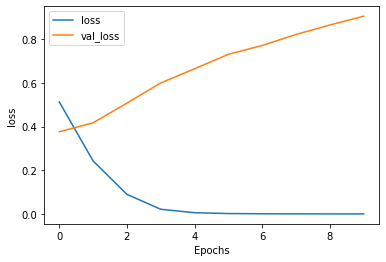

In [17]:
plot_graphs(history_flatten, 'accuracy')
plot_graphs(history_flatten, 'loss')

Model2: LSTM

In [18]:
lstm_dim = 32


model_lstm = tf.keras.Sequential([
             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
             tf.keras.layers.Dense(dense_dim, activation = 'relu'),
             tf.keras.layers.Dense(1, activation = 'sigmoid')                    
])

model_lstm.compile(loss = 'binary_crossentropy',
                      optimizer = 'adam',
                      metrics = ['accuracy'])

model_lstm.summary()                    

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               12544     
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________


In [19]:
history_lstm = model_lstm.fit(training_padded, training_labels_final, epochs = 10, validation_data = (testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 52s 62ms/step - loss: 0.4747 - accuracy: 0.7656 - val_loss: 0.3888 - val_accuracy: 0.8213
Epoch 2/10
782/782 [==============================] - 47s 61ms/step - loss: 0.2970 - accuracy: 0.8804 - val_loss: 0.3915 - val_accuracy: 0.8231
Epoch 3/10
782/782 [==============================] - 47s 60ms/step - loss: 0.2399 - accuracy: 0.9072 - val_loss: 0.4265 - val_accuracy: 0.8062
Epoch 4/10
782/782 [==============================] - 47s 60ms/step - loss: 0.1991 - accuracy: 0.9269 - val_loss: 0.4959 - val_accuracy: 0.8164
Epoch 5/10
782/782 [==============================] - 47s 60ms/step - loss: 0.1575 - accuracy: 0.9421 - val_loss: 0.4981 - val_accuracy: 0.8063
Epoch 6/10
782/782 [==============================] - 47s 60ms/step - loss: 0.1205 - accuracy: 0.9572 - val_loss: 0.5591 - val_accuracy: 0.8018
Epoch 7/10
782/782 [==============================] - 47s 60ms/step - loss: 0.0949 - accuracy: 0.9668 - val_loss: 0.7462 - val_accuracy:

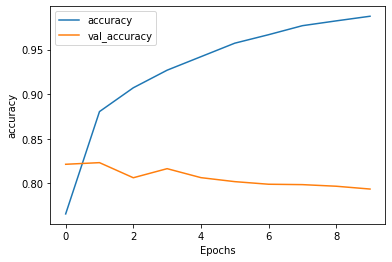

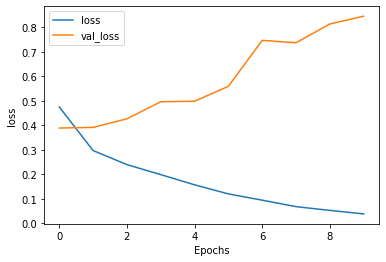

In [20]:
plot_graphs(history_lstm, 'accuracy')
plot_graphs(history_lstm, 'loss')

Model3: GRU

In [21]:
gru_dim = 32


model_gru = tf.keras.Sequential([
             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
             tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
             tf.keras.layers.Dense(dense_dim, activation = 'relu'),
             tf.keras.layers.Dense(1, activation = 'sigmoid')                    
])

model_gru.compile(loss = 'binary_crossentropy',
                      optimizer = 'adam',
                      metrics = ['accuracy'])

model_gru.summary()                    

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               9600      
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 6)                 390       
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [22]:
history_gru = model_gru.fit(training_padded, training_labels_final, epochs = 10, validation_data = (testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 51s 61ms/step - loss: 0.4846 - accuracy: 0.7459 - val_loss: 0.4154 - val_accuracy: 0.8164
Epoch 2/10
782/782 [==============================] - 46s 59ms/step - loss: 0.2930 - accuracy: 0.8786 - val_loss: 0.4229 - val_accuracy: 0.8268
Epoch 3/10
782/782 [==============================] - 46s 59ms/step - loss: 0.2235 - accuracy: 0.9118 - val_loss: 0.4421 - val_accuracy: 0.8187
Epoch 4/10
782/782 [==============================] - 47s 60ms/step - loss: 0.1604 - accuracy: 0.9417 - val_loss: 0.5010 - val_accuracy: 0.8123
Epoch 5/10
782/782 [==============================] - 46s 59ms/step - loss: 0.1060 - accuracy: 0.9625 - val_loss: 0.5952 - val_accuracy: 0.7958
Epoch 6/10
782/782 [==============================] - 54s 70ms/step - loss: 0.0651 - accuracy: 0.9784 - val_loss: 0.7647 - val_accuracy: 0.7943
Epoch 7/10
782/782 [==============================] - 47s 60ms/step - loss: 0.0449 - accuracy: 0.9851 - val_loss: 0.8758 - val_accuracy:

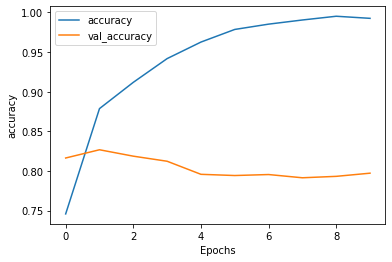

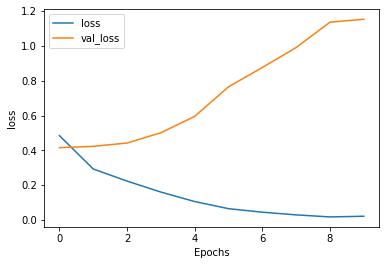

In [23]:
plot_graphs(history_gru, 'accuracy')
plot_graphs(history_gru, 'loss')

Model4: Convolution

In [24]:

filters = 128
kernel_size = 5

model_conv = tf.keras.Sequential([
             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
             tf.keras.layers.Conv1D(filters = filters, kernel_size = kernel_size, activation = 'relu'),
             tf.keras.layers.GlobalAveragePooling1D(),
             tf.keras.layers.Dense(dense_dim, activation = 'relu'),
             tf.keras.layers.Dense(1, activation = 'sigmoid')                    
])

model_conv.compile(loss = 'binary_crossentropy',
                      optimizer = 'adam',
                      metrics = ['accuracy'])

model_conv.summary()   

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 120, 16)           160000    
                                                                 
 conv1d (Conv1D)             (None, 116, 128)          10368     
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_6 (Dense)             (None, 6)                 774       
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171,149
Trainable params: 171,149
Non-trainable params: 0
________________________________________________

In [25]:
history_convolution = model_conv.fit(training_padded, training_labels_final, epochs = 10, validation_data = (testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 14s 9ms/step - loss: 0.4377 - accuracy: 0.7963 - val_loss: 0.3883 - val_accuracy: 0.8262
Epoch 2/10
782/782 [==============================] - 8s 10ms/step - loss: 0.2760 - accuracy: 0.8862 - val_loss: 0.3971 - val_accuracy: 0.8261
Epoch 3/10
782/782 [==============================] - 7s 9ms/step - loss: 0.2233 - accuracy: 0.9121 - val_loss: 0.4331 - val_accuracy: 0.8205
Epoch 4/10
782/782 [==============================] - 7s 9ms/step - loss: 0.1842 - accuracy: 0.9312 - val_loss: 0.4862 - val_accuracy: 0.8144
Epoch 5/10
782/782 [==============================] - 8s 10ms/step - loss: 0.1550 - accuracy: 0.9440 - val_loss: 0.5373 - val_accuracy: 0.8104
Epoch 6/10
782/782 [==============================] - 8s 10ms/step - loss: 0.1247 - accuracy: 0.9576 - val_loss: 0.6348 - val_accuracy: 0.7992
Epoch 7/10
782/782 [==============================] - 7s 9ms/step - loss: 0.0985 - accuracy: 0.9675 - val_loss: 0.7338 - val_accuracy: 0.8022
Ep

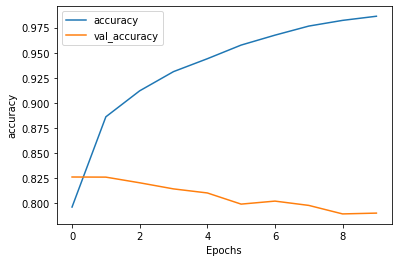

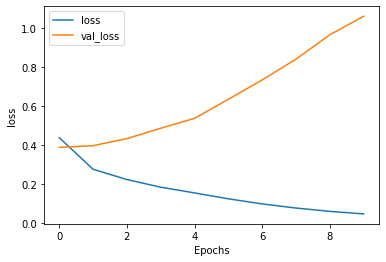

In [26]:
plot_graphs(history_convolution, 'accuracy')
plot_graphs(history_convolution, 'loss')